# Salary Prediction Analysis (Sample Project)

ML Model Deployment with Flask on Heroku

# Problem Defination

A sample data set describing candidate Experience and offered pay based on interview, test score. Using this data predict salary of the candidate.

Experience : Total number of Experience of candidate

Interview Score : Marks given to candidate

test score : Marks earned by giving test.

# Data Gathering

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# reading dataset
df = pd.read_csv("hiring.csv")
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# Data Preparation

In [3]:
df.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       6 non-null      object 
 1   test_score       7 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [5]:
df.corr()

,test_score,interview_score,salary
test_score,1.000000,0.143066,-0.003004
interview_score,0.143066,1.000000,0.037820
salary,-0.003004,0.037820,1.000000


In [6]:
df.describe()

,test_score,interview_score,salary
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


# Feature Engineering

In [7]:
# fill score with mean value

df['test_score'].fillna(df['test_score'].mean() , inplace=True)

In [8]:
df

,experience,test_score,interview_score,salary
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [9]:
df['experience'].fillna(0, inplace=True)

In [10]:
df

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [11]:
def string_to_number(word):
    dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6 , 'seven':7, 'eight':8, 'nine':9,
            'ten':10, 'eleven':11, 'twelve':12, 0:0}
    return dict[word]

In [12]:
df['experience'] = df['experience'].apply(lambda x: string_to_number(x))
df

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


# Exploratory Data Analysis

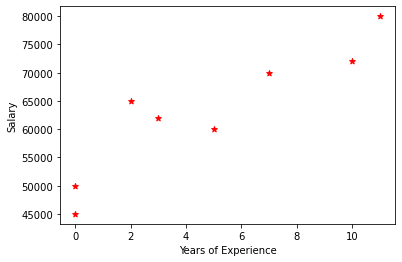

In [13]:
x = df['experience']
y = df['salary']
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='red',marker='*')
plt.show()

In [14]:
# Classify Features as x and Label as y
x = df.iloc[:,:3]
y = df.iloc[:,-1]

In [15]:
# Classify Dataset into Training and Testing
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.1, random_state=1)

# Modelling

In [16]:
# creating linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [17]:
# train model by providing training data
Mymodel = model.fit(xtrain,ytrain)

# Model Evaluation

In [18]:
# Prediction
y_pred = Mymodel.predict(xtest)
y_pred

array([78637.86229367])

In [19]:
comparision = pd.DataFrame(y_pred, ytest)
comparision

,0
salary,
80000,78637.862294


In [20]:
# Manual Prediction
y_manual = Mymodel.predict([[5,8,7]])
y_manual

array([61938.84379748])

# Accuracy Score

In [22]:
# 1) Mean Squared Error

from sklearn.metrics import mean_squared_error

# calculate errors
errors = mean_squared_error(ytest, y_pred)
# report error
print(errors)

1855419.131002392


In [23]:
# 2) Root Mean Squared Error

from sklearn.metrics import mean_squared_error

# calculate errors
errors = mean_squared_error(ytest, y_pred, squared=False)
# report error
print(errors)

1362.1377063286927


In [24]:
# 3) Mean Absolute Error

from sklearn.metrics import mean_absolute_error

# calculate errors
errors = mean_absolute_error(ytest, y_pred)
# report error
print(errors)

1362.1377063286927


In [ ]:
# save the model using ickle
import pickle
pickle.dump(Mymodel, open("salary_analysis.pkl", "wb"))

In [ ]:
model = pickle.load(open('salary_analysis.pkl', 'rb'))

In [ ]:
model.predict([[5,8,7]])